# Market generator

In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import datetime

import base
import market_generator
from utils import tosig
import importlib
importlib.reload(market_generator)

<module 'market_generator' from '../src/market_generator.py'>

## Load monthly paths

In [64]:
# ^GSPC is S&P 500.
ticker = "^GSPC"
MG = market_generator.MarketGenerator(ticker, start=datetime.date(2000, 1, 1))

Computing log-signatures: 100%|██████████| 228/228 [00:00<00:00, 5519.39it/s]


## Plot paths

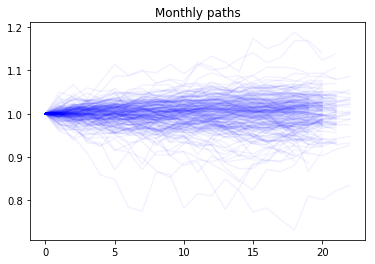

In [65]:
for path in MG.windows:
    plt.plot(path[::2, 1], "b", alpha=0.05)

plt.title("Monthly paths")
plt.show()

## Train generative model

In [ ]:
MG.train()

Training:  66%|██████▌   | 6587/10000 [00:09<00:05, 631.06it/s]

## Generate

In [75]:
generated = np.array([MG.generate(cond) for cond in MG.conditions])
#generated = MG.generate(MG.conditions[150], n_samples=len(MG.logsigs))

generated_sigs = np.array([tosig.logsig2sig(logsig, 2, 4) for logsig in tqdm(generated)])
real_sigs = np.array([tosig.logsig2sig(logsig, 2, 4) for logsig in tqdm(MG.logsigs)])

100%|██████████| 227/227 [00:04<00:00, 54.81it/s]


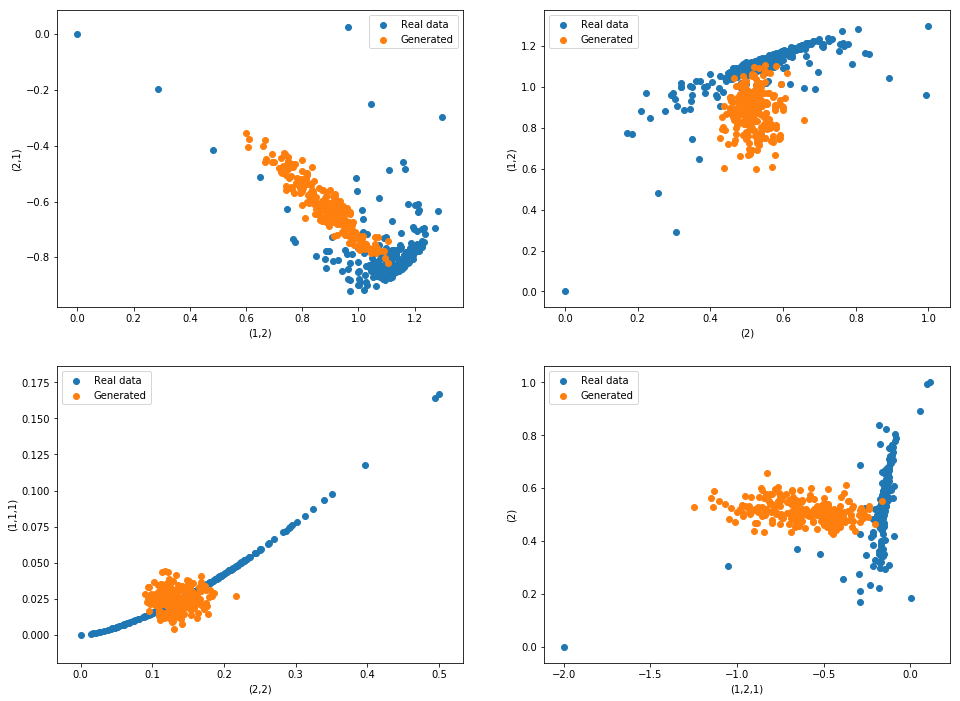

In [76]:
from esig.tosig import sigkeys

keys = sigkeys(2, 4).split()

PROJECTIONS = [(4, 5), (2, 4), (6, 7), (9, 2)]

plt.figure(figsize=(16, 12))
for i, projection in enumerate(PROJECTIONS):
    plt.subplot(2, 2, i + 1)

    plt.scatter(real_sigs[:, projection[0]], real_sigs[:, projection[1]],
                label="Real data")
    plt.scatter(generated_sigs[:, projection[0]], generated_sigs[:, projection[1]],
               label="Generated")
    plt.xlabel(keys[projection[0]])
    plt.ylabel(keys[projection[1]])
    plt.legend()
    
plt.show()

## Validation: two-sample statistical test

In [77]:
res = process_discriminator.test(generated_sigs, real_sigs, order=4, compute_sigs=False,
                                 confidence_level=0.99)

print("Are the generated and real distributions DIFFERENT? {}".format(res))

Computing signatures of population 2: 100%|██████████| 227/227 [00:00<00:00, 2292.36it/s]


Are the generated and real distributions DIFFERENT? True
